# Spock: LLM-based Tool for Bibliometric Analysis of  Scientific Literature

### Tool Presentation:

Researchers often need to work with peer publications within their lab, which can be both time-consuming and resource-demanding. This involves obtaining structured data, conducting thorough literature reviews, and post-processing findings to support their research objectives. 
Large Language Models (LLMs) and their capability of understanding and generating natural language text bring promising opportunities that can be integrated into a researcher's daily life to simply enhance automation and research pace.
One such integration is the Spock, a bibliometric analysis tool integrated within Slack, designed to interact with the Acceleration Consortium members' Google scholar profile.
The workflow follows an automatic retrieval of authors' peer-reviewed and non-peer-reviewed papers and patents from journals and preprint servers (i.e., arXiv, chemRxiv) submissions.
This data is then post-processed via Retrieval-Augmented Generation (RAG) allowing an in-depth analysis of papers by giving, for instance, details about the scientific workflow and techniques used by the author of a scientific paper or describing AI/screening algorithms mentioned in the paper. Multi-class classification of the publication's topics in accelerated materials discovery is also an important feature of our tool. 
It can provide insights by keeping a systematic track of what researchers at the Laboratory are writing, compare research groups within the organization over several years to identify trends and opportunities, and facilitate easier interaction among scientists. Finally, it helps in preparing and submitting future research proposals.

### Features of project:


Automated Data Retrieval:
LLM-Enhanced Analysis: Uses Large Language Models (LLMs) for Retrieval-Augmented Generation (RAG) to provide detailed analysis of scientific workflows, techniques, and AI/screening algorithms mentioned in papers.
Multi-class Classification of papers:.
Slack Integration.
Research Tracking and Interaction.


# Demo

### Importing the libraries and Objects

In [1]:
from utilities import Bot_LLM,Author,Publication

# Features walkthrough

We are going to use an "example" using my mentor's (Mehrad Ansari's) latest paper.

### Initializing LLM

In [2]:
llm = Bot_LLM(folder_path = 'db')

### Fetching the Author data 

In [3]:
# Initiating Author object
author = Author("Mehrad Ansari")

# Fetching latest date
latest_publication = Publication(author.get_last_publication())

print(latest_publication)
# Setting up and ouputing in a json file
author.setup_author("output.json", latest_publication)



An error occurred while parsing the PDF link: list index out of range
{'title': 'History-agnostic battery degradation inference', 'abstract': 'lithium-ion batteries (libs) have attracted widespread attention as an efficient energy storage device on electric vehicles (ev) to achieve emission-free mobility. however, the performance of libs deteriorates with time and usage, and the state of health of used batteries are difficult to quantify. having accurate estimations of a battery’s remaining life across different life stages would benefit maintenance, safety, and serve as a means of qualifying used batteries for second-life applications. since the full history of a battery may not always be available in downstream applications, in this study, we demonstrate a deep learning framework that enables dynamic degradation rate prediction, including both short-term and long-term forecasting, while requiring only the most recent battery usage information. specifically, our model takes a rolling 

### Scanning the PDF
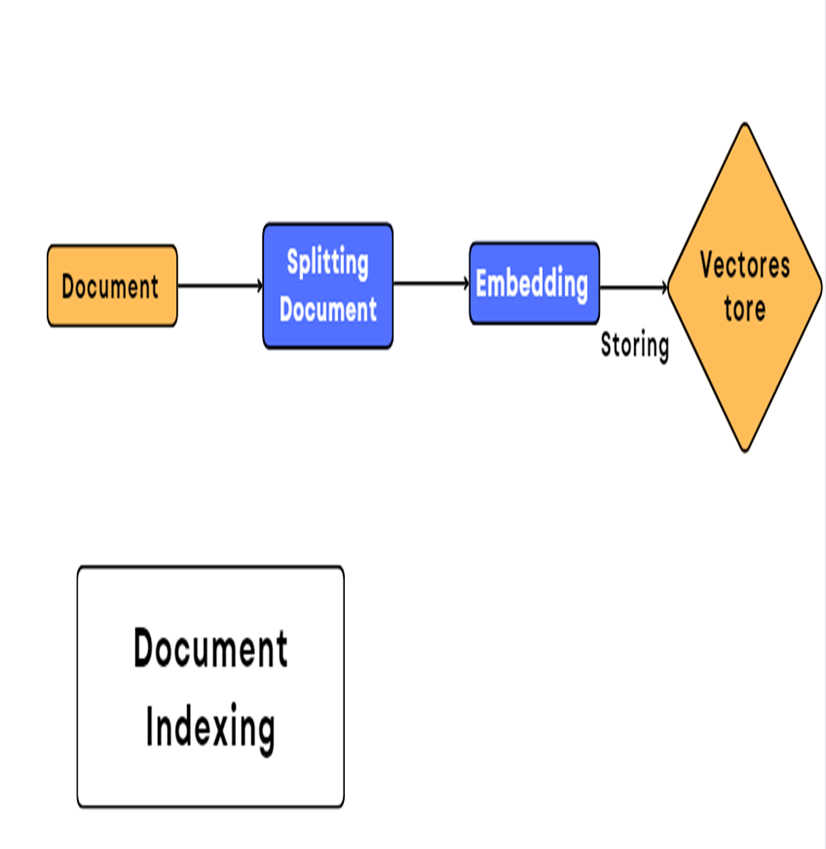
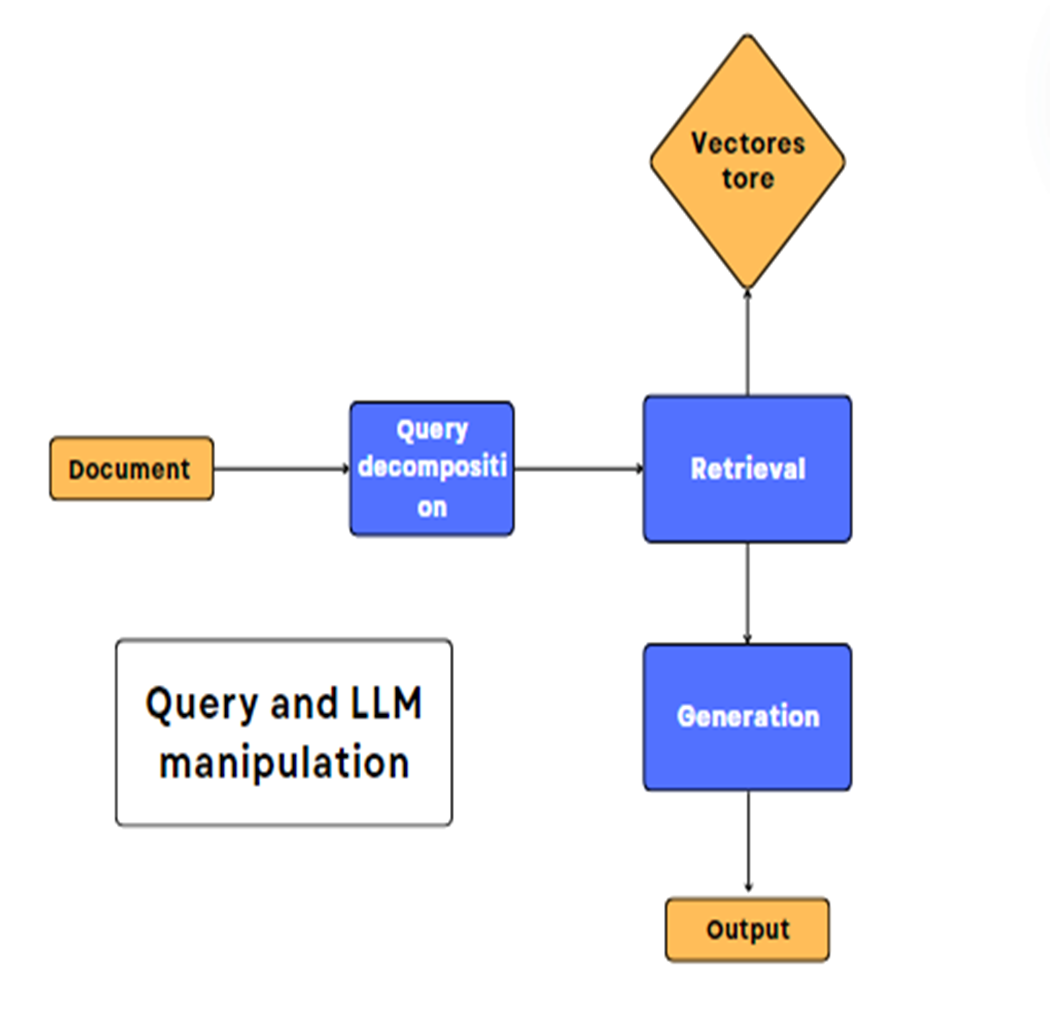


In [7]:
import json
def Running(file, index=0):

    llm = Bot_LLM(folder_path='db/db'+str(index))
    llm.chunk_indexing(file)    
    #llm.folder_path = txt
    dico = {}
    ## Querying the RAG
    dico['affiliation'] = llm.query_rag("What are the authors affiliation. Output a dictionary ?")
    print("-----")
    dico['topic']  = llm.query_rag("What are topics of the paper ?")
    
    print("-----")
    dico['new materials'] = llm.query_rag("does the article mention any new material discovery ?")
    print("-----")
    dico['screening algorithms'] = llm.query_rag("A screening algorithm is a systematic procedure or method used to identify individuals who may have or be at risk for a particular condition or trait within a large population. These algorithms are designed to quickly and efficiently screen out those who are unlikely to have the condition, while identifying those who may require further diagnostic evaluation or intervention. If there are any, What are the screening algorithms used in the paper ?")
    print("-----")
    dico['AI algorithms'] = llm.query_rag("AI algorithms are computational methods and processes used to solve specific tasks by mimicking human intelligence. These algorithms enable machines to learn from data, make decisions, and perform tasks that typically require human intelligence.")
    print("-----")
    
    dico['workflow'] = llm.query_rag("Can you describe to me the workflow used by the author ?")
    print("-----")
    dico['methods'] = llm.query_rag("can you do a methods description ?")
    print("-----")
    dico['models'] = llm.query_rag("what are the models used in the article ?")
    print("-----")
    dico['funding'] = llm.query_rag("does the article mention who funded it")
    print("-----")
    print(dico)
    return dico



import glob
files_in_dir = glob.glob('pdfs'+ "/*")
dico_response = {}


def load_json_data(json_file_path):
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)
    return data

dico_response = load_json_data('benchmarking.json')
i = 1
true_index = 0
for index,file in enumerate(files_in_dir):
    print(index,file)
    if true_index == 5:
        break
    try:
        if file.split('/')[1] not in dico_response and "History" not in file.split('/')[1]:
            print(true_index,file)
            true_index += 1
            dico_response[file.split('/')[1]] = Running(file,true_index)
        else:
            print("file already done")
    except Exception as e:
        print(e)
        dico_response[file.split('/')[1]] = None
    print(file+" done")
        
with open('benchmarking.json', 'w') as json_file:
    json.dump(dico_response, json_file)

0 pdfs/closing_the_execution_gap_in_generative_ai_for_chemicals_and_materials_freeways_or_safeguards.pdf
0 pdfs/closing_the_execution_gap_in_generative_ai_for_chemicals_and_materials_freeways_or_safeguards.pdf
attempt to write a readonly database
pdfs/closing_the_execution_gap_in_generative_ai_for_chemicals_and_materials_freeways_or_safeguards.pdf done
1 pdfs/History-agnostic battery degradation inference.pdf
file already done
pdfs/History-agnostic battery degradation inference.pdf done
2 pdfs/A_data-driven_framework_to_improve_the_wear_resistance_of_a_low-alloy_steel_fabricated_by_laser_powder_bed_fusion.pdf
1 pdfs/A_data-driven_framework_to_improve_the_wear_resistance_of_a_low-alloy_steel_fabricated_by_laser_powder_bed_fusion.pdf


> Entering new RetrievalQA chain...

> Finished chain.
Based on the provided context, here is the output:

```
{
"Authors": [
    {"Name": "Jiahui Zhang", "Affiliation": "University of Toronto"},
    {"Name": "Sagar Patel", "Affiliation": "Nikon SLM Soluti

### Future work and implementations

Using the nougat tool for PDF data extraction (https://facebookresearch.github.io/nougat/)
Using a better and larger LLM model (Llama 3.1 instead of the Llama 3 8b)
Allow user to directly choose to “chat” with papers in the dataset
Allow user to ask directly the LLM a question and get an answer from all the papers 
Publishing about the Spock project
